<a href="https://colab.research.google.com/github/trevor-webster/2024Fall-MOCS/blob/main/Assignment2CellularAutomata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment #1**
Carina Manitius, Trevor Webster, Derek Devine, Nate Borland

# 1

$$\frac{dN_1}{dt} = \frac{r_1 N_1(K_1 - N_1 - \alpha_{12} N_2)}{K1}$$
$$\frac{dN_2}{dt} = \frac{r_2 N_2(K_2 - N_2 - \alpha_{21} N_1)}{K2}$$



Please find answer to 1 in julia at

https://github.com/trevor-webster/2024Fall-MOCS/blob/main/pluto/lotka-volterra.jl

clone url

https://github.com/trevor-webster/2024Fall-MOCS.git

in sections
- Lotka volterra generalized version
- Stability
- Lotka volterra Coexistence ρ


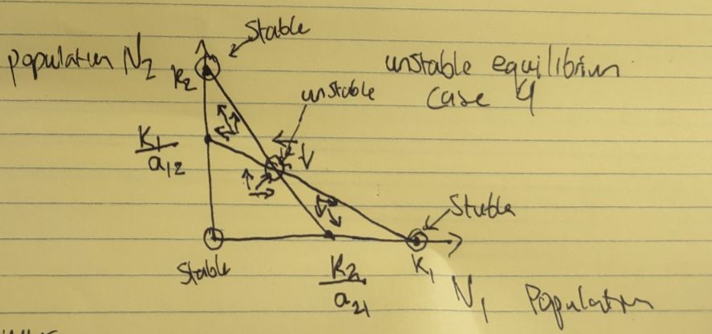

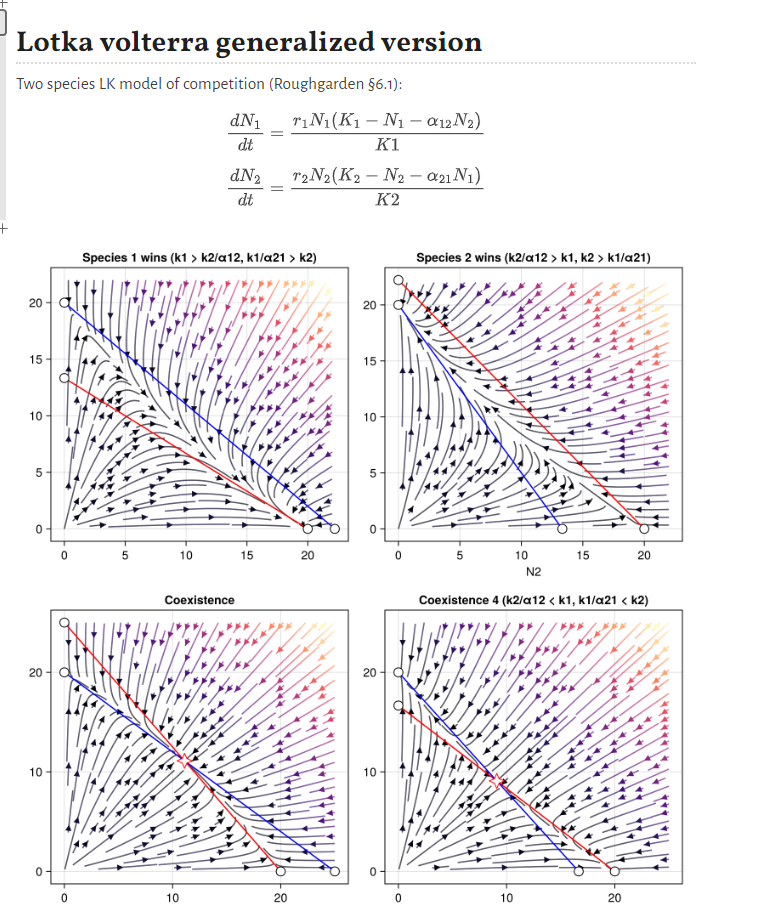

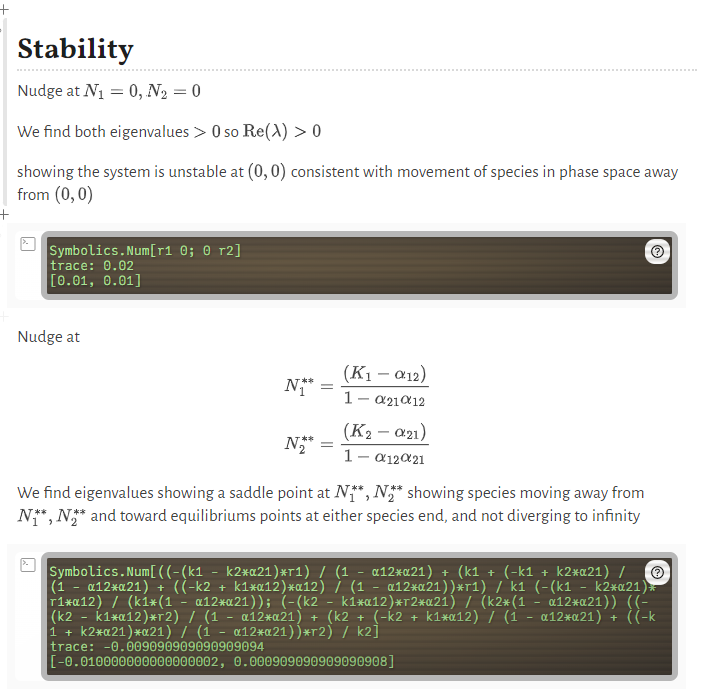

# 2

Yes using the colleague's suggestion it's possible to preserve healthy levels of both N1 and N2.

See the sketch below.  In order to do this, the proportional vertical then horizontal decrease would have to be periodically applied so that the population stays cycling in the region bounded by the line y=x and the N2 orange nullcline.

An example of how it could do this can be seen in the graphs below: Decreasing starts from somewhere in the upper region of the graph above the y=x diagonal and the decreasing traces eventually reach the N2 orange nullcline which goes to the blue N1 nullcline and continues the reduction via the thin black lines, which then hit the green stream line that brings it back up to the blue N1 nullcline, which then continually cycles within the turquoise ovals outlined.

These decreases and increases happen at intervals of time and proportion so that they exactly land on the lines in such a way that immediately during the interval in between decreases via the black lines, the population values are raised back up to the point on the blue N1 nullcline via the stream lines, which will decrease again via the black lines back to the green stream line, and continually cycle up and down like this forever.

Thus little cycles like this are possible if the proportions are exact, and the decreases are timed exactly that they land in the bottom left hand corner.  This could happen in many scenarios and many $N2 > N1$ values.

The minimum proportion needed is .33 < ρ < 1.  Looking at the figures, one can see this is because the region in which the a point can oscillate and continually while applying periodic reductions lies in the triangular region above the y=x line and below the N2 orange nullcine. Within this whole region from the y=x line to the N2 nullcline lie the region that we can bounce back and forth while cycling back into and hovering around the intersection semi-stable point in graph to anywhere in the triangular region and back again.

The region is a triangle with base 10k height 3333.33 k, so its area is 16,650, just simplifying and considering it to be a 10 by 10 grid (instead of 10k by 10k), then the area would be (10*3.33)/2 = 16.65.  With these values, the area above the y=x line is 50, which is the applicable starting area (the domain of the problem), because only half of the problem space meeets the criteria that N2 > N1 (the domain corresponding to all the starting values where without intervention N1's population collapses).

So with all this in mind, the triangular portion which you can bounce around and stabilize in is $\frac{16.65}{50}$ percent of our total original starting area. That proportion of stabilitzation area to total area is 33.33%, or ρ = .33. This is equal to and the minimum proportion that is necessary to reduce both population sizes in order to create a stable flow.

So then for the intervention to be effective:
$ \frac{1}{3} $ < ρ < 1

---
![image](https://drive.google.com/uc?id=16gaEliJd6V7uznhT8feQ_U7W0WUO6mPs)

![image](https://drive.google.com/uc?id=1vZT_WQJwrqHfk7Kb_bpvA-BzFu-DkJfu)

![image](https://drive.google.com/uc?id=1SHk6dXcn5sbMwd-qTlrEgZ1Q32BemQdc)

![image](https://drive.google.com/uc?id=19c3Vg_x3pxcpRbmUwS-eDoBcWpTckDBS)

---

The rates of change of $N_1$ and $N_2$ with periodic reductions by a factor of $ρ$ are expressed by the following ODEs:

$$\frac{dN_1}{dt} = \frac{r_1N_1(K_1-N_1-α_{21}N_2-ρN_1)}{K_1}$$

$$\frac{dN_2}{dt} = \frac{r_2N_2(K_2-N_2-α_{12}N_1-ρN_2)}{K_2}$$

The following diagrams depict the phase space for populations of $N_1$ and $N_2$ for various values of $ρ$, demonstrating that the minimum value of $ρ$ for maintaining $N_1 > 0$ and $N_2 > 0$ is $ρ = \frac{1}{3}$

![image](https://drive.google.com/uc?id=1hvZVRYAdR6-EQSJuBrofaP3PQch2gLHq)

![image](https://drive.google.com/uc?id=1IffIXMDJ6oGzwKkui1ifMonG65TzPfb-)

![image](https://drive.google.com/uc?id=1WaQh50jQ1ncFf0Pdf1CAbUu6j5QB6PDo)

# 3

First start by defining the general functions to implement Euler and Heun's methods for given variables. For Euler's method, this is done by adding the value of X in the previous time and the derivative of the value of X in the previous time. For Heun's method, this is done by adding the value of X in the previous time and the average of the derivative of X in the previous time and the derivative of Euler's estimate of X.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##### Function to implement Euler's method
def euler_method(f, x0, t0, T, h):
    t_values = np.arange(t0, T + h, h) # define array with time step values
    x_values = np.zeros(len(t_values)) # create empty array with stand in 0's for X values (length = same as length of timesteps in t_values array)
    x_values[0] = x0                   # set the value of X at t0 to x0

    for i in range(1, len(t_values)):  # creates a loop which runs Euler's method for each time step
        x_values[i] = x_values[i-1] + (h * f(t_values[i-1], x_values[i-1]))

    return t_values, x_values          # return the T and X arrays so you can access them outside of the function

##### Function to implement Heun's method
def heun_method(f, x0, t0, T, h):
    t_values = np.arange(t0, T + h, h)
    x_values = np.zeros(len(t_values))
    x_values[0] = x0

    for i in range(1, len(t_values)):
        # Start by calculating the Euler's method estimate
        e_x_value = x_values[i-1] + (h * f(t_values[i-1], x_values[i-1]))
        # Heun correction
        x_values[i] = x_values[i-1] + (h * ((f(t_values[i-1], x_values[i-1]) + f(t_values[i], e_x_value))/2))

    return t_values, x_values

We can then show how these functions work for an example set of parameters. In this case, estimating the function:  
$$f(x) = x^2$$

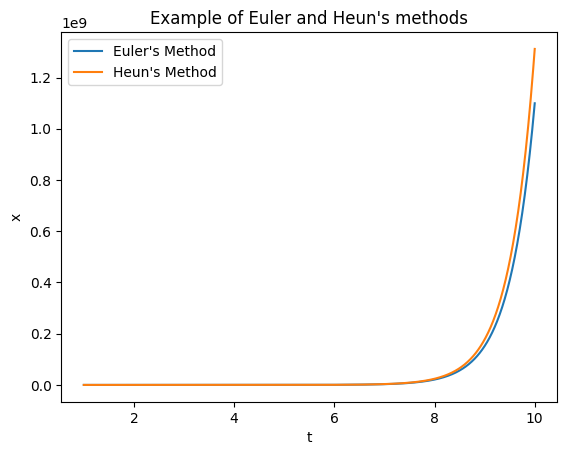

In [ ]:
x0 = 20
t0 = 1
T = 10
h = 0.01

# Define derivative function (e.g. dx/dt x^2 = 2x)
def f(t, x):
    return 2 * x

##### Implement both methods using example defined above
t_euler, x_euler = euler_method(f, x0, t0, T, h)
t_heun, x_heun = heun_method(f, x0, t0, T, h)


# Plot the solutions
plt.plot(t_euler, x_euler, label="Euler's Method")
plt.plot(t_heun, x_heun, label="Heun's Method")
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Example of Euler and Heun's methods")
plt.show()

What is the relationship between Euler's method and a discrete time model?

Euler's method is essentially a way of 'discretizing' continuous time models so that you can simulate them in a computer. The way that you implement a discrete time model and Euler's method in code are very similar - you update the system's state at set time intervals based on a function which defines how that state changes over time. When using Euler's method, this function is a differential equation (i.e. the ODE of the continuous model). While when using a discrete time model, this function can ostensibly be in any form so long as it describes how the system evolves in discrete time.

# 4

The following code defines and runs the model for the specified parameters for both Euler and Heun's methods.

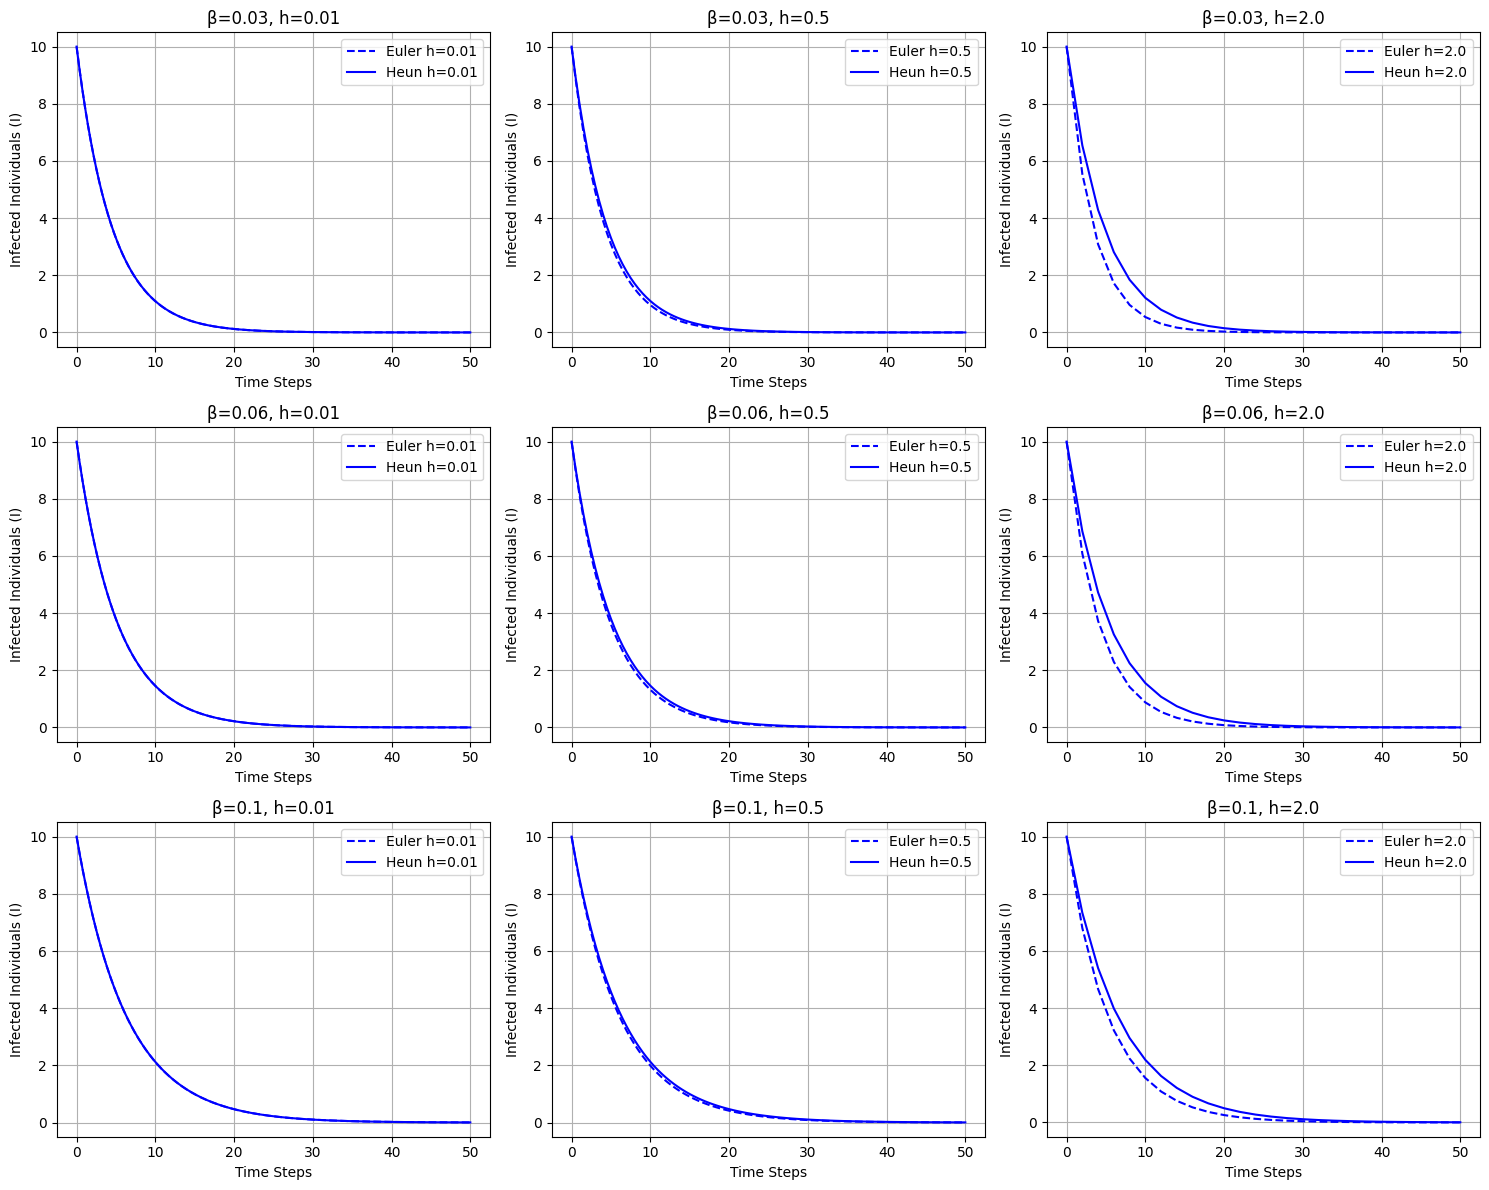

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
N = 100  # Total population
gamma = 0.25  # Recovery rate
beta_values = [0.03, 0.06, 0.1]  # Infection rates
h_values = [0.01, 0.5, 2.0]  # Step sizes for Euler's and Heun's methods

# Time parameters
t0 = 0  # Initial time
T = 50  # Final time

# Initialize model
S0 = 90
I0 = 10


# Define SIS model ODE's
def SIS_ODE(S, I, beta, gamma):
    dS = (gamma * I) - ((beta / N) * I * S)
    dI = ((beta / N) * S * I) - (gamma * I)
    return dS, dI


# Define Euler's method (slightly modified from above)
def euler_method(f, S0, I0, t0, T, h, beta, gamma):
    t_values = np.arange(t0, T + h, h)
    s_values = np.zeros(len(t_values))
    i_values = np.zeros(len(t_values))
    s_values[0] = S0
    i_values[0] = I0

    for i in range(1, len(t_values)):
        dS, dI = f(s_values[i-1], i_values[i-1], beta, gamma)
        s_values[i] = s_values[i-1] + (h * dS)
        i_values[i] = i_values[i-1] + (h * dI)

    return t_values, s_values, i_values


# Define Heun's method (slightly modified from above)
def heun_method(f, S0, I0, t0, T, h, beta, gamma):
    t_values = np.arange(t0, T + h, h)
    s_values = np.zeros(len(t_values))
    i_values = np.zeros(len(t_values))
    s_values[0] = S0
    i_values[0] = I0

    for i in range(1, len(t_values)):
        # Start by calculating the Euler's method estimate
        dS, dI = f(s_values[i-1], i_values[i-1], beta, gamma)
        e_s_value = s_values[i-1] + (h * dS)
        e_i_value = i_values[i-1] + (h * dI)
        # Heun correction
        dS_e, dI_e = f(e_s_value, e_i_value, beta, gamma)
        s_values[i] = s_values[i-1] + (h * (dS + dS_e) / 2)
        i_values[i] = i_values[i-1] + (h * (dI + dI_e) / 2)

    return t_values, s_values, i_values


##### RUN!

results = {
    'euler': {},
    'heun': {}
}

for beta in beta_values:
    for h in h_values:
        t_euler, s_euler, i_euler = euler_method(SIS_ODE, S0, I0, t0, T, h, beta, gamma)
        results['euler'][(beta, h)] = (t_euler, s_euler, i_euler)

        t_heun, s_heun, i_heun = heun_method(SIS_ODE, S0, I0, t0, T, h, beta, gamma)
        results['heun'][(beta, h)] = (t_heun, s_heun, i_heun)


##### PLOT!

plt.figure(figsize=(15, 12))

for i, beta in enumerate(beta_values):
    for j, h in enumerate(h_values):
        plt.subplot(3, 3, 3 * i + j + 1)

        # Retrieve Euler results
        t_euler, s_euler, i_euler = results['euler'][(beta, h)]
        plt.plot(t_euler, i_euler, label=f'Euler h={h}', color='blue', linestyle='--')

        # Retrieve Heun results
        t_heun, s_heun, i_heun = results['heun'][(beta, h)]
        plt.plot(t_heun, i_heun, label=f'Heun h={h}', color='blue')

        plt.title(f'β={beta}, h={h}')
        plt.xlabel('Time Steps')
        plt.ylabel('Infected Individuals (I)')
        plt.legend()
        plt.grid()

plt.tight_layout()
plt.show()

Is there a noticeable difference between the two methods? What might be going on?

At small time steps (e.g. h = 0.01), the estimates from Euler and Heun's methods are very similar. However, as the size of the time step increases, the difference in the estimates provided by each method also increases. This is because Euler's method uses only the derivative of the SIS equation in the previous time step to estimate how the number of infected and sick people will change in the next time step. In the case of this example, where the number of infected people is decreasing exponentially, this means that the slope of the derivative will be decreasing with each time step (i.e. fewer recoveries). As a result, larger time steps will cause the estimates from Euler's method to decrease at a faster rate than the mathematical model.

Heun's method reduces this error by estimating the derivative over the next time step as the average of the derivative at the current time step and the derivative at Euler's estimate of the next time step. In this case of a negative exponential slope, Euler's estimate of the derivative at the current time step will be lower than the derivative from the previous time step. Taking the average helps to reduce the “overshoot” associated with Euler's method. Mathematically, this is because Heun's method captures the second-order derivative in addition to the first. The mathematical proof of this in in Question 5.

In summary, both Euler and Heun's methods are imperfect ways of simulating continuous dynamics, with the difference between these methods and the mathematical model increasing as the time step used in the simulation increases. By capturing the second-order dervative as well as the first, Heun's method gets closer to the mathematical model than Euler's method. Therefore, the difference between the two methods will be larger for larger time steps, as seen in the graphs above.

# 5

We have two solutions to this question. The first is the more simplified version and the 2nd which shows the math in further detail. We asked the TA about including both solutions and recieved no objection.

#5 high level proof

Show that the Global Precision of Heun's method is: $ O(h^2) $

**Note:**

The Taylor Series Expansion, or true solution is denoted as: $ X_t $

The numerical solution using Heun's method is denoted as: $ x_{n}$


**Heun's method has two main steps:**

1. Prediction Portion: $$ y_p = x_n + hf(x_n)$$
2. Correction Step: $$x_{n+1} = x_n + h[\frac{f(x_n) + f(y_p)}{2}]$$

The true solutions Taylor expansion can be denoted by:

$$X(t_{n+1}) = X(t_{n}) + h\dfrac{dx}{dt}(t_{n}) + \frac{h^2}{2}\dfrac{d^2x}{dt^2}(t_{n}) + O(h^3) ... $$

Heun's Approximation's Taylor expansion:

$$ x_{n+1} = x_n + \frac{h}{2}[f(x_n) + f(y_p)] $$

$$ ⟹ X(t_{n+1}) = X(t_{n}) + h\dfrac{dx}{dt}(t_{n}) + \frac{h^2}{2}[\dfrac{d^2x}{dt^2}(t_{n}) +  \frac{h}{3}\dfrac{d^3x}{dt^3}(t_{n})] + O(h^3) ... $$

Subtract the two solutions and we are left with The local error at each step:

$$ e_n = x_n - X(t_n) = \frac{h^3}{6} \dfrac{d^3x}{dt^3}(t_{n}) $$

The Global error after N steps, $ E_{N} $ is the sum of the errors at each step:

$$E_N = \sum_{}^{\frac{T}{h}} e_n = \sum_{}^{\frac{T}{h}} \frac{h^3}{6} \dfrac{d^3x}{dt^3}(t_{n}) = (\frac{T}{h}) (\frac{h^3}{6} \dfrac{d^3x}{dt^3}) (t_{n}) = O(h^2)  $$


#5 detailed proof


**Step 1: re-work Heun's method using the Euler esitmate**

Heun's method has two main steps:

The numerical solution using Heun's method is denoted as:

1. Prediction Portion using Euler's method: $$x_{E}(t+h) = x(t) + hf(x,t) $$
2. Correction Step: $$x_{H}(t+h) = x(t) + \frac{h}2(f(x,t) + f(x_E, t+h)) $$


Where $x_E$ denotes the numerical solution using Euler's method and $x_H$ denotes the numerical solution using Huen's method.


Based on these equations, $f(x_E, t+h)$ in Heun's method is the derviative of Euler's method with respect to time. Taking that derviatve we get:

$$f(x_E, t+h) = \frac{d}{dt}x_{E}(t+h) = \frac{d}{dt}x(t) + h\frac{d}{dt} f(x,t)$$

We know that $\frac{dx}{dt} = f(x,t)$ and that $\frac{df}{dt} = f'(x,t)$, so:

$$f(x_E, t+h) = f(x,t) + hf'(x,t)$$


We can then plug this back into the Heun's method equation:

$$X_{H}(t+h) = x(t) + \frac{h}2(f(x,t) + f(x,t) + hf'(x,t)) $$

Which simplifies to:

$$X_{H}(t+h) = x(t) + hf(x,t)+\frac{h^2}2(f'(x,t)) $$


**Step 2: compare the re-written Heun's method with the Taylor Series of the true solution to estimate the local error of Heun's method**

The Taylor series of the true solution can be written as:

$$X_{T}(t+h) = x(t) + hf(x,t)+\frac{h^2}2f'(x,t) + O(h^3) ... $$


By subtracting Heun's method (as defined at the end of step 1) from the Taylor Series of the true solution, we can find the local error in Heun's method.

$$ X_{T}(t+h) - X_{H}(t+h) = O(h^3) ... $$

Thus the local error of Heun's method is in order $h^3$

**Step 3: calculate the global error in Heun's method**

If global error = $GE$ and local error = $LE$, then we can say that:


$${GE} = \sum_{t=1}^{T} {LE} = \sum_{t=1}^{T} {Oh^3}$$

If you have timesteps $h$ the you have $\frac{T}h$ local errors. So:

$$GE = \frac{T}h Oh^3 = TOh^2$$

Therefore, the global error of Heun's method is of order $h^2$.



# 6

SIRS

$
\dot S = -\beta S I + \mu (N - (S + I))
\\
\dot I = \beta S I - \gamma I
\\
\dot R = \gamma I - \mu (N - (S + I))
$

Nullcline $\dot S = 0$ at $S^* = \frac{\mu (N - I)}{I \beta + \mu}$

Nullcline $\dot I = 0$ at $S^* = \frac{\gamma}\beta$

Equilibrium point
$$
S^{**} = \frac{\gamma}\beta = \frac{\mu (N - I)}{I \beta + \mu}
\\
I^{**} = \frac{\mu (N \beta - \gamma)}{\beta (\gamma + \mu)}
$$


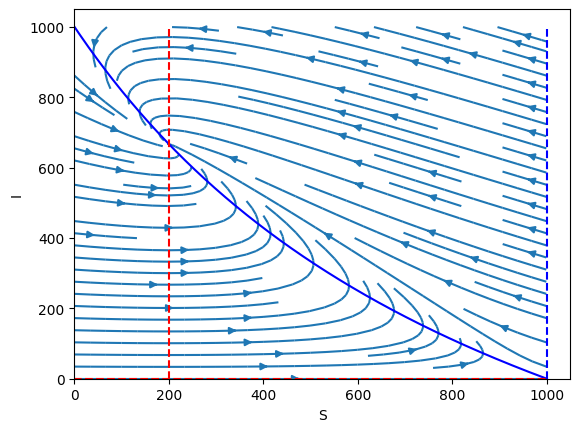

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import scipy.stats as stats

N = 1000

def StreamplotSIRS(beta, gamma, mu):
  Svalues,Ivalues = np.meshgrid(np.arange(0,N,1), np.arange(0,N,1))
  Sdot = -beta * Svalues * Ivalues +  mu * (N - (Svalues + Ivalues))
  Idot = beta * Svalues * Ivalues -  Ivalues * gamma

  plt.streamplot(Svalues, Ivalues, Sdot, Idot)

  Ivalues = np.arange(0,N,1)
  plt.plot( (mu * (N - Ivalues))
    / (Ivalues * beta + mu)
    , Ivalues
    , label=r'$S^* = \frac{\mu (N - I)}{I \beta + \mu}$'
    , color= 'b'

  )
  # S, I = RunSIRS(1, beta, gamma, mu)
  # plt.plot(S, I)
  plt.vlines(gamma/beta , ymin=0, ymax=N, color="r", linestyles="dashed", label=0)
  plt.vlines(N , ymin=0, ymax=N, color="b", linestyles="dashed", label=N)

  # plt.hlines((beta*N - gamma)/beta , xmin=0, xmax=N,color="red", linestyles="dashed", label = f'I*={(beta*N - gamma)/beta}')
  plt.hlines(0 , xmin=0, xmax=N,color="red", linestyles="dashed", label = 'I = 0')

  plt.xlabel('S')
  plt.ylabel('I')
  plt.show()

beta=5e-05
gamma=0.01
mu = 5e-02
# mu = 5e-04
StreamplotSIRS(beta, gamma, mu)



For the SIS model, the closed system rule $N = S + I $ makes it a 1 dimension system. In a 1 dimension continuous sytem, the direction of phase space is determined, and there is no freedom to cycle. Chaos is not possible in the 1 dimension continuous system because chaotic behavior is bounded and does not go to infinity, therefore goes to equilibrium


For the predator-prey LK model and the SIRS model, the freedom of 2 dimensions allows a cycle. We can show if a cycle exists by stability analysis or finding the critical threshold for limit cycle. Chaotic behavior is not possible for 2 dimension continuous system, because a characteristic of chaotic behavior is boundedness. Eventually a tracectory would cross a previous point and you have a cycle, or you converge to a fixed point.

The trace of the Jacobian of $\dot S, \dot I$ is $-\gamma - \mu$ suggesting $Re(\lambda d) < 0$ so the system is stable, not chaotic.

We can further show a equilibrium cycle is possible such that dominant eigenvalues are zero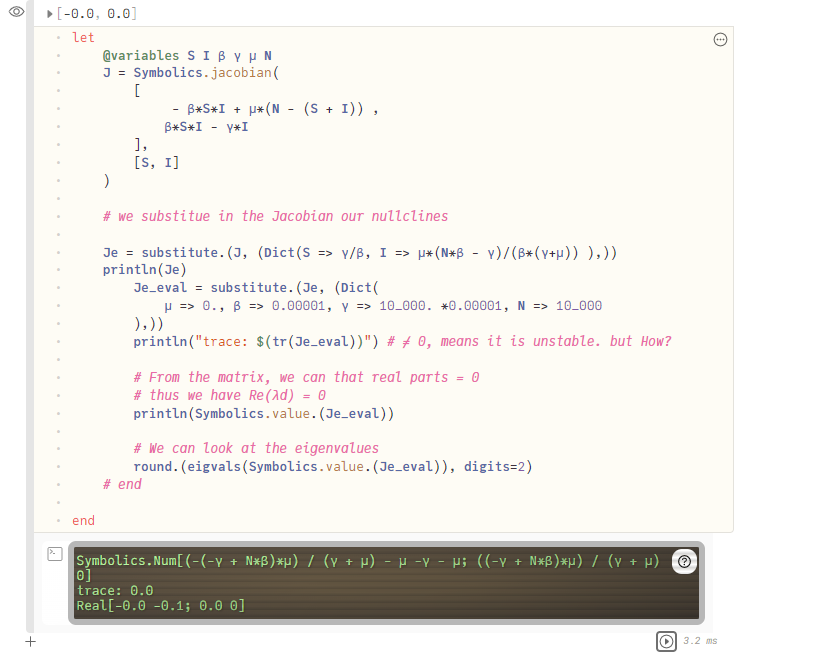

# 7

**Worker Ant Role Distribution**

In ant colonies, females other than the queen are known as worker ants, taking on one of a handful of specialized roles within the colony. The possible roles vary between species, but some common jobs are foraging for food, defending the nest from predators, caring for young, and maintaining the structure of the nest. The success of the nest depends on maintaining an adequate number of each role, so that none of the responsibilities go unmet.

Because shocks to the population are inevitable, it's important that workers be able to change jobs on the fly to meet the needs of the colony. In real colonies, a worker signals her current job by periodically releasing an associated pheromone. She also detect pheromonoes in her vicinity, and if she detects a dearth of pheromones associated with a particular job, she will switch to perform that job and release its associated pheromone herself.

We wanted our model to primarily capture this balancing and replenishment of roles, so we made several idealizations. First, we disregard the role of drones and treat the queen's birthing as happening at a fixed rate $γ$, so our model only concerns the worker ants. Second, we condensed the worker roles down into Nest Workers ($W$), Foragers ($F$), and Soldiers ($S$). Thirdly, in real ant colonies, ants will switch from any role to any other role, but to maintain the directionality of flow we only allowed certain conversions depicted in the compartmental model below.

![Ant Colony Compartmental Model](https://drive.google.com/uc?id=1yD5qM7vRcyyxfdAVDRrCTw3T7maQoyir)

Since workers are born in the nest, we chose to have $γ$ feed only into $W$, so increases to $F$ and $S$ are only possible through conversion. We also assumed that the exterior jobs ($F$ and $S$) are orders of magnitude more hazardous than working in the nest, so we only apply a death rate ($β$) to those jobs. Assuming that soldiering would be meaningfully more dangerous than foraging, we gave each exterior job its own death rate ($β_F$ < $β_S$).

Other model parameters include $α$, the maximum portion of a job that can change to another job in one time step, and the target job densities $K_F$ & $K_S$. Since the sum of job densities is equal to 1, we don't need to specify $K_W$ ($K_W = 1 - K_F - K_S$). The final parameter used here is $N$, which represents the total number of living ants ($N = W + F + S$). Since $N$ is used to calculate the ratio of a given job to the total, each inter-box flow rate depends on all 3 state variables.

These flow rates are given by the following formulas:

$$f_{WS}(W,F,S,Δt) = αW(1-\frac{S}{NK_S})Δt$$

$$f_{WF}(W,F,S,Δt) = αW(1-\frac{F}{NK_F})Δt$$

$$f_{FS}(W,F,S,Δt) = αF(1-\frac{S}{NK_S})Δt$$

Where $1-\frac{F}{NK_F}$ goes from 1 to 0 as $F$ goes from 0 to its target portion of the total population ($NK_F$).

The map from $W(t)$ to $W(t + Δt)$ is given by the following formula ($W$, $S$, and $F$ are all functions of $t$, here written without the function notation for brevity):

$$W(t+Δt) = W(t) + ΔW$$

$$ΔW = γΔt - αW(1-\frac{F}{NK_F})Δt - αW(1-\frac{S}{NK_S})Δt$$

Taking the derivative with respect to $Δt$ simply gets rid of the $Δt$ terms, so evaluating at $Δt = 0$ gives the following ODE:

$$\frac{dW}{dt} = γ - αW(1-\frac{F}{NK_F}) - αW(1-\frac{S}{NK_S})$$

Using this same process for the flow from $W$ to $S$ and $F$ to $S$ give the following:

$$\frac{dF}{dt} = αW(1-\frac{F}{NK_F}) - αF(1-\frac{S}{NK_S}) - Fβ_F$$

$$\frac{dS}{dt} = αW(1-\frac{S}{NK_S}) + αF(1-\frac{S}{NK_S}) - Sβ_S$$

The simulation below encodes these dynamical equations, with sliders to control the parameters and initial conditions. It's worth noting that there's some unintended behavior when $S$ or $F$ are above their target percent. When this occurs, $\frac{F}{NK_F}$ (for example) is greater than one, so the associated growth term goes negative, resulting in flow that goes in the opposite direction of the arrow. This can be worked around by respecting this relationship in the initial conditions, and will never occur starting from an empty system (or any where the only initial ants are in $W$).

The system trends towards a stable equilibrium where each job population approaches its target percentage. Due to the interaction between $γ$, $α$, $β_F$, and $β_S$, however, the distribution of jobs always skews towards workers. This effect is more pronounced for lower values of $α$, and higher values of $γ$, $β_F$, and $β_S$. The population of all jobs typically undergoes an initial growth period, then levels off as the combined effect of $β_F$ and $β_S$ balance out $γ$. The time it takes to reach this equilibrium varies based on the parameter values.

In order to illlustrate the effect of the distribution balancing, we added a less mathematically rigorous but more illustrative option controlled by the random_deaths toggle. Enabling this will cause random catastrophes where either $F$ or $S$ will be cut in half (perhaps by a rain storm or a wasp attack). These sudden drops allow more clear visualization of the role balancing behavior, as the quantities of the unaffected roles will dip following the catastrophe while they convert to fill the role that was diminished. To avoid flow that goes against the arrow directions, enabling this toggle will also cause the $1 - \frac{F}{NK_F}$ terms to evaluate as `max(0, 1-F/(N*K_F))` so they don't go negative. These catastrophes also clarify the effect of the arrow from $F$ to $S$, as $S$ experiences a noticeably steeper recovery after catastrophe.

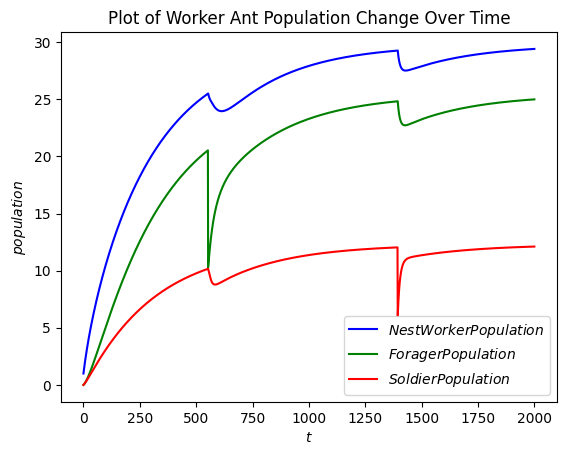

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# worker birth rate (gamma), default = 0.2
birth_rate = 0.2 # @param {type:"slider", min:0.1, max:5, step:0.1}
# maximum % of one job that can change in a time step (alpha), default = 0.02
change_rate = 0.02 # @param {type:"slider", min:0.01, max:0.5, step:0.001}
# forager death rate (beta_F), default = 0.004
f_death = 0.004 # @param {type:"slider", min:0, max:0.1, step:0.001}
# soldier death rate (beta_S), default = 0.008
s_death = 0.008 # @param {type:"slider", min:0, max:0.1, step:0.001}

# target forager % of total population (K_F), default = 0.5
f_target = 0.5 # @param {type:"slider", min:0.1, max:0.5, step:0.01}
# target soldier % of total population (K_S), default = 0.2
s_target = 0.2 # @param {type:"slider", min:0.1, max:0.4, step:0.01}

# initial number of Nest Workers, default = 1
w_initial = 1 # @param {type:"slider", min:1, max:100, step:1}
# initial number of Foragers, default = 0
f_initial = 0 # @param {type:"slider", min:0, max:100, step:1}
# initial number of Soldiers, default = 0
s_initial = 0 # @param {type:"slider", min:0, max:100, step:1}

# randomly halve the population of S or F, default = False
random_deaths = True # @param {type:"boolean"}

# time step length
dt = 1.
# total simulation duration
t_total = 2000

def init():
  global w, f, s, w_result, f_result, s_result, t, timestamps, last_catastrophe_time
  w = w_initial
  f = f_initial
  s = s_initial
  t = 0.
  w_result = [w]
  f_result = [f]
  s_result = [s]
  timestamps = [t]
  last_catastrophe_time = 200

def obs():
  global w, f, s, w_result, f_result, s_result, t, timestamps
  s_result.append(s)
  f_result.append(f)
  w_result.append(w)
  timestamps.append(t)

def soldier_pull():
  global w, f, s
  pull = 1 - s/((w+f+s)*s_target)
  if(random_deaths):
    return max(0, pull)
  else:
    return pull

def forager_pull():
  global w, f, s
  pull = 1 - f/((w+f+s)*f_target)
  if(random_deaths):
    return max(0, pull)
  else:
    return pull

def update():
  global w, f, s, w_result, f_result, s_result, t, timestamps, last_catastrophe_time

  f_pull = forager_pull()
  s_pull = soldier_pull()

  dWdt = birth_rate - change_rate*w*s_pull - change_rate*w*f_pull
  dFdt = change_rate*w*f_pull - change_rate*f*s_pull - f*f_death
  dSdt = change_rate*w*s_pull + change_rate*f*s_pull - s*s_death

  next_w = w + dWdt*dt
  next_f = f + dFdt*dt
  next_s = s + dSdt*dt

  # attacks periodically randomly wipe out half of soldiers or foragers
  if(random_deaths):
    if(t > last_catastrophe_time + 200. and np.random.rand() < 0.002):
      last_catastrophe_time = t
      if(np.random.rand() < 0.5):
        next_f = next_f*0.5
      else:
        next_s = next_s*0.5

  w = next_w
  f = next_f
  s = next_s
  t = t+dt

init()
while(t < t_total):
  update()
  obs()

plt.plot(w_result, 'b-', label=r'$Nest Worker Population$')
plt.plot(f_result, 'g-', label=r'$Forager Population$')
plt.plot(s_result, 'r-', label=r'$Soldier Population$')
plt.xlabel(r'$t$')
plt.ylabel(r'$population$')
plt.title(r'Plot of Worker Ant Population Change Over Time')
plt.legend()
plt.show()

While many idealizations were made to represent these ant colony dynamics as a dynamical system, there is still some insight to be gleaned. The relationships between the model parameters gives a sense of the dynamics between birth rates, death rates, and the readiness with which worker ants changes jobs in a real ant colony. Changing jobs too readily can lead to a rubberband effect, where too many ants leave one role for another and must quickly change back to maintain balance in a cycle. In this model, these cycles can only occur for high values of $α$ ($>0.3$), and here they occur every other frame. In a model that doesn't rely on the mean-field approximation (such as an agent-based one), where information propogates more slowly through the system, we would expect to see cycles more spread out in time for high values of $α$. If $α$ is too low however, necessary jobs aren't filled quickly enough and colony needs would go unmet.

There is also an intuitive dynamic between birth rate and death rate that can be observed here, where low birth rates relative to death rates result in depressed populations of all jobs. The interaction between these parameters also determine where the total population stabilizes, and how long it takes the colony to reach that point. The fixed birth rate and relative death rate mean that the colony will always stabilize at some point when the populations grow enough that $Fβ_F + Sβ_S = γ$.

The amount of idealization done to reach this model does put a limit on how much can be learned. On reflection, a dynamical systems model has a number of constraints that are in tension with the workings of a real ant colony, such as the generally uni-directional flows from one box to another conflicting with ants' ability to change back and forth between roles as needed. Additionally, the ant colony operates in this way to be adaptable to unpredictable shocks to its population. These shocks are more naturally represented with stochastic differential equations or an agent-based model than ordinary differential equations, and we were only able to capture these dynamics in the simulation, not in the ODEs themselves.